#EOSC 511 Lab 10#

##Xiaoxin (Cindy) Yu##

## *Problem One* ##

>Using the scheme presented in this section, modify *advection3.py* to
solve the following advection problem: The wind is moving along the
x-axis with speed $u=20 \hbox{ m/s}$. The initial distribution curve is
$290 \hbox{ km}$ in width. Use your program to approximate the curve
during 24 hours.

>a\) Run your program for different orders of approximating polynomials
(up to 4). Compare the accuracy of approximation for different orders.
Do you see better results with increasing order? Is this true for all
orders from 0 to 4? Is there any particularity to odd and even order
polynomials?

>b\) For odd ordered polynomials, *advection3.py* uses the representation
of $a_{j,k}$ that involves an extra point to the right of the centre
grid point. Modify the table of coefficients for odd ordered polynomials
([Table $\ell=1$](#tab:ell1))and ([Table $\ell=3$](#tab:ell3)) to use the extra point to the left of the
centre grid point. Run your program again and compare the results of 2
different representations of $a_{j,k}$ for order 1 and 3, respectively.
Is one representation better than the other, or about the same, or does
each have its own problem? How, do you think the different
representation affects the result?

**A**:
The function $u_{t}+cu_{x}$= 0 has solutions of the form c(x, t) =f(x-ut), each of which represents a right moving wave of a given shape. To compare the accuracy of each order, I chose the shape computed from the last time step and compared it with its original shape. If the shape is in bad agreement with the original shape, we can say the corresponing scheme is not that accurary. 

The plot below shows different model versions (from order 0 to 4) and the sum of absolute error between their final shape and the original shape. 

For the odd number, we can see order 0 yields the worst agreement with its original shape, while version 4 produces lower amplitude erros. Increasing the order of polynominals further improves the quality of the result. But the rate of improvement is reduced for larger orders. This principle is also applicable on the odd number schemes.

>Scheme 0: sum of absolute error for the last time step :0.0496677691375

>Scheme 1a:sum of absolute error for the last time step :0.0496677691375

>Scheme 2: sum of absolute error for the last time step :0.0485741692716

>Scheme 3a:sum of absolute error for the last time step :0.0485741692716

>Scheme 4 :sum of absolute error for the last time step :0.0485464005873

After changing the coefficients for odd ordered polynomials to use the extra point to the left of the centre grid point. Form our results below, we can see the difference is not significantly. However, we can expect more difference if the shape of curve is more irregular.

>Scheme 1b:sum of absolute error for the last time step :0.0496677691375

>Scheme 3b:sum of absolute error for the last time step :0.0485741692716


(One can also compare their phases. But in the plots below, we can not see a considerable increase of phase errors. (The highest value in the final shapes for different schemes all locate at x=129.) So I will skip this part.)

The figures in below cells shows different schemes. For each cell, there are three plots: the **upper plot shows **the time evolution** of the transport equation. The **lower left** one shows **the analytical solution and simulation at the last time step** (the 24th hour). **The lower right** one shows the **difference** between the analytical solution and simulation at the last time step.  

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.colorbar as colorbar
import numpy as np
from numlabs.lab10.advection_funs2 import *
%matplotlib inline

##scheme0

Matrix of Bott Scheme: [[ 0.  0.  1.  0.  0.]]
sum of absolute error:0.0496677691375


/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


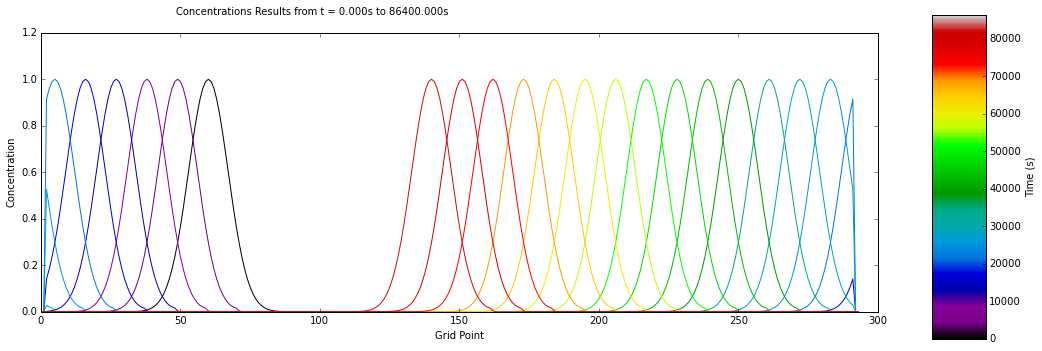

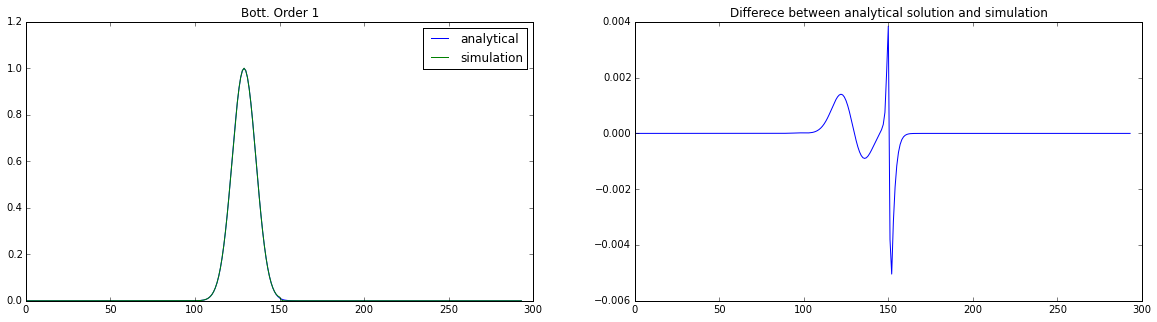

In [2]:
t=24*3600*20
a1,b1,c1,d1=advection3(t,0,'O') #24*3600*20,24h
make_graph(a1,b1,c1,d1)

theFig=plt.figure(figsize=(20,5))
theAx=theFig.add_subplot(121)
ana=analytical(1,a1[-1])
plt.plot(ana[0,:],label='analytical')
plt.plot(a1[-1],label='simulation')
plt.title('Bott. Order 1')
plt.legend()

theAx=theFig.add_subplot(122)
plt.plot(a1[-1]-ana[0,:])
plt.title('Differece between analytical solution and simulation')
print ('sum of absolute error:%s'%np.sum(np.abs(a1[-1]-ana[0,:])))
plt.show()

* For the upper one, the black line is the initial shape and the red one is the shape at last time step.

##scheme1a##

Matrix of Bott Scheme: [[ 0.  0.  1.  0.  0.]
 [ 0.  0. -1.  1.  0.]]
sum of absolute error:0.0496677691375


/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


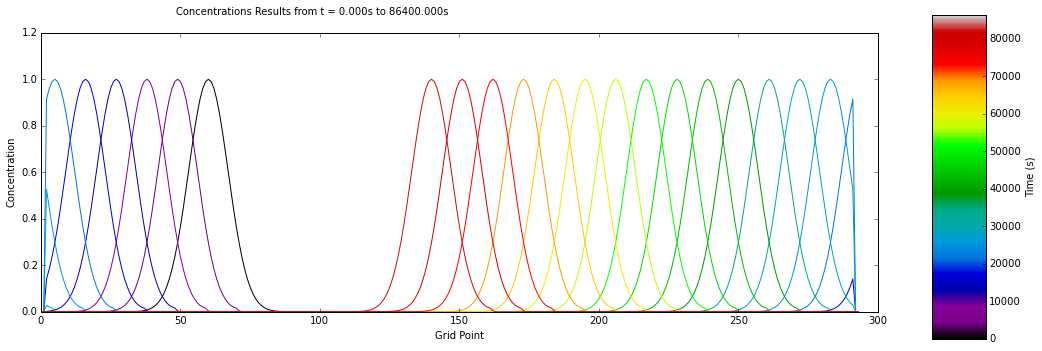

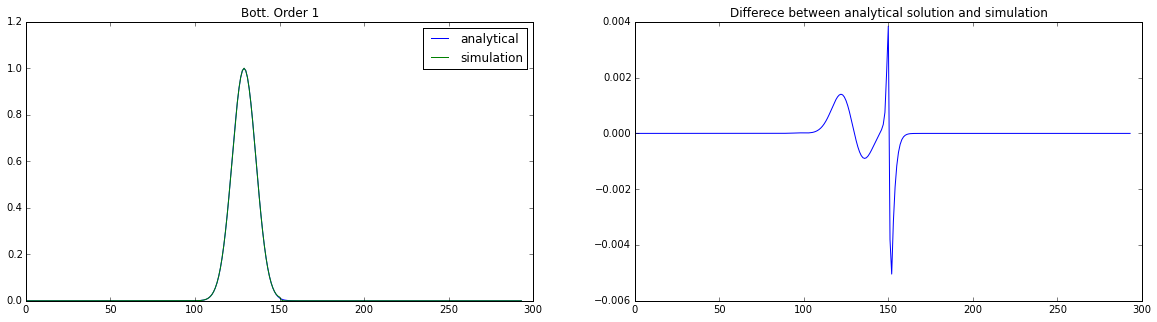

In [3]:
t=24*3600*20
a1,b1,c1,d1=advection3(t,1,'O') #24*3600*20,24h
make_graph(a1,b1,c1,d1)

theFig=plt.figure(figsize=(20,5))
theAx=theFig.add_subplot(121)
ana=analytical(1,a1[-1])
plt.plot(ana[0,:],label='analytical')
plt.plot(a1[-1],label='simulation')
plt.title('Bott. Order 1')
plt.legend()

theAx=theFig.add_subplot(122)
plt.plot(a1[-1]-ana[0,:])
plt.title('Differece between analytical solution and simulation')
print ('sum of absolute error:%s'%np.sum(np.abs(a1[-1]-ana[0,:])))
plt.show()

##scheme2##

Matrix of Bott Scheme: [[ 0.   0.   1.   0.   0. ]
 [ 0.  -0.5  0.   0.5  0. ]
 [ 0.   0.5 -1.   0.5  0. ]]
sum of absolute error:0.0485741692716


/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


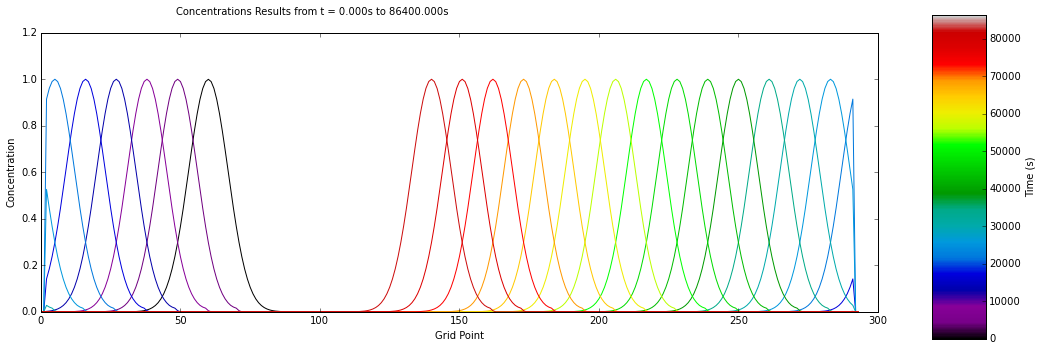

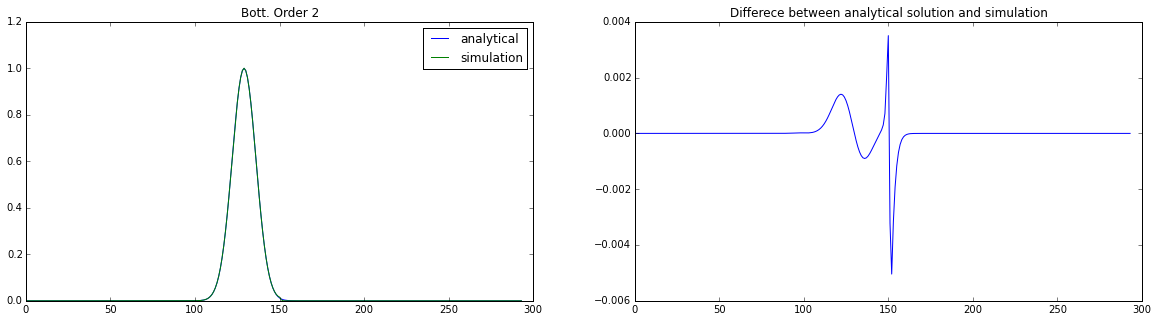

In [4]:
t=24*3600*20
a2,b2,c2,d2=advection3(t,2,'O') #24*3600*20,24h
make_graph(a2,b2,c2,d2)

theFig=plt.figure(figsize=(20,5))
theAx=theFig.add_subplot(121)
ana=analytical(1,a2[-1])
plt.plot(ana[0,:],label='analytical')
plt.plot(a2[-1],label='simulation')
plt.title('Bott. Order 2')
plt.legend()

theAx=theFig.add_subplot(122)
plt.plot(a2[-1]-ana[0,:])
plt.title('Differece between analytical solution and simulation')
print ('sum of absolute error:%s'%np.sum(np.abs(a2[-1]-ana[0,:])))
plt.show()

##scheme3a##

Matrix of Bott Scheme: [[ 0.          0.          1.          0.          0.        ]
 [ 0.         -0.33333333 -0.5         1.         -0.16666667]
 [ 0.          0.5        -1.          0.5         0.        ]
 [ 0.         -0.16666667  0.5        -0.5         0.16666667]]
sum of absolute error:0.0485741692716


/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


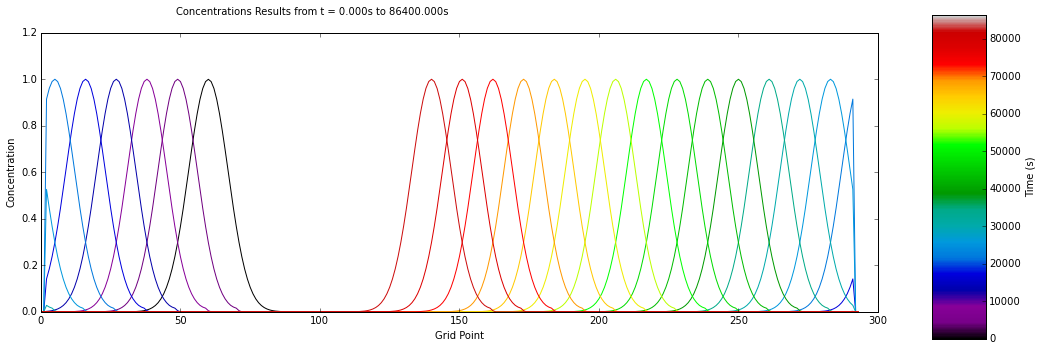

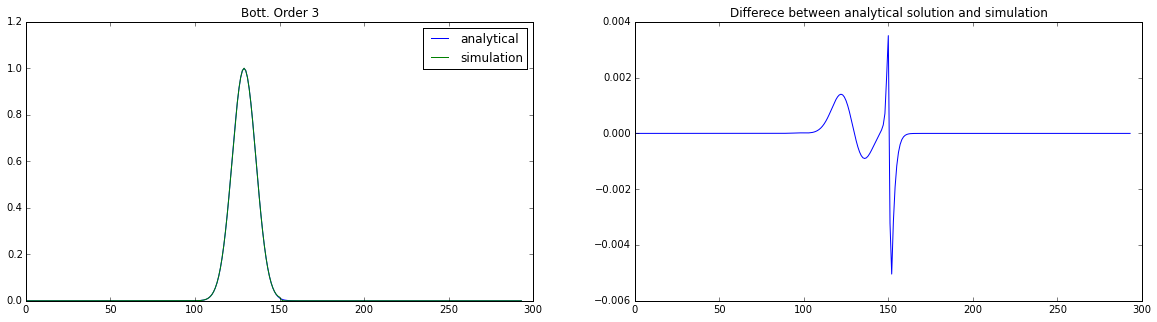

In [5]:
t=24*3600*20
a3,b3,c3,d3=advection3(t,3,'O') #24*3600*20,24h
make_graph(a3,b3,c3,d3)

theFig=plt.figure(figsize=(20,5))
theAx=theFig.add_subplot(121)
ana=analytical(1,a3[-1])
plt.plot(ana[0,:],label='analytical')
plt.plot(a3[-1],label='simulation')
plt.title('Bott. Order 3')
plt.legend()

theAx=theFig.add_subplot(122)
plt.plot(a3[-1]-ana[0,:])
plt.title('Differece between analytical solution and simulation')
print ('sum of absolute error:%s'%np.sum(np.abs(a3[-1]-ana[0,:])))
plt.show()

##scheme4##

Matrix of Bott Scheme: [[ 0.          0.          1.          0.          0.        ]
 [ 0.08333333 -0.66666667  0.          0.66666667 -0.08333333]
 [-0.04166667  0.66666667 -1.25        0.66666667 -0.04166667]
 [-0.08333333  0.16666667  0.         -0.16666667  0.08333333]
 [ 0.04166667 -0.16666667  0.25       -0.16666667  0.04166667]]
sum of absolute error:0.0485464005873


/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


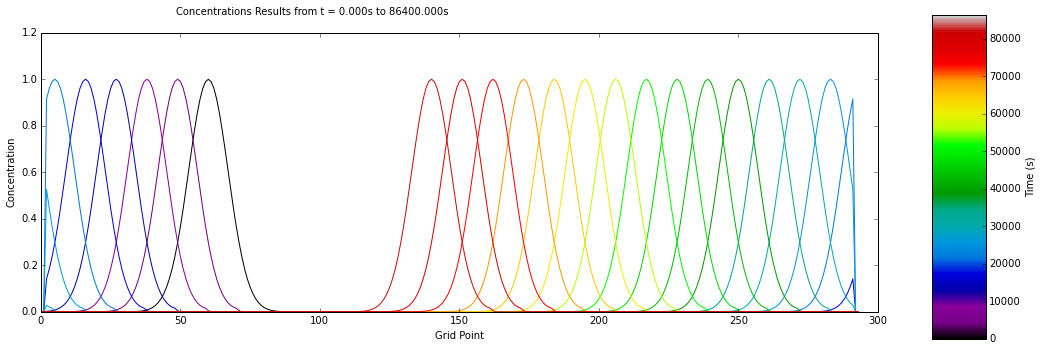

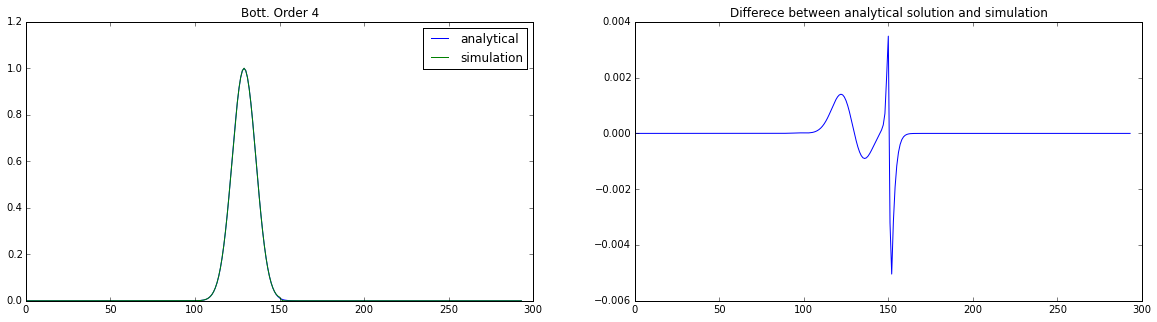

In [6]:
t=24*3600*20
a4,b4,c4,d4=advection3(t,4,'O') #24*3600*20,24h
make_graph(a4,b4,c4,d4)
theFig=plt.figure(figsize=(20,5))
theAx=theFig.add_subplot(121)
ana=analytical(1,a4[-1])
plt.plot(ana[0,:],label='analytical')
plt.plot(a4[-1],label='simulation')
plt.title('Bott. Order 4')
plt.legend()

theAx=theFig.add_subplot(122)
plt.plot(a4[-1]-ana[0,:])
print ('sum of absolute error:%s'%np.sum(np.abs(a4[-1]-ana[0,:])))
plt.title('Differece between analytical solution and simulation')
plt.show()

# After modification:

##scheme1b##

Matrix of Bott Scheme: [[ 0.  0.  1.  0.  0.]
 [ 0. -1.  1.  0.  0.]]
sum of absolute error:0.0496677691375


/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


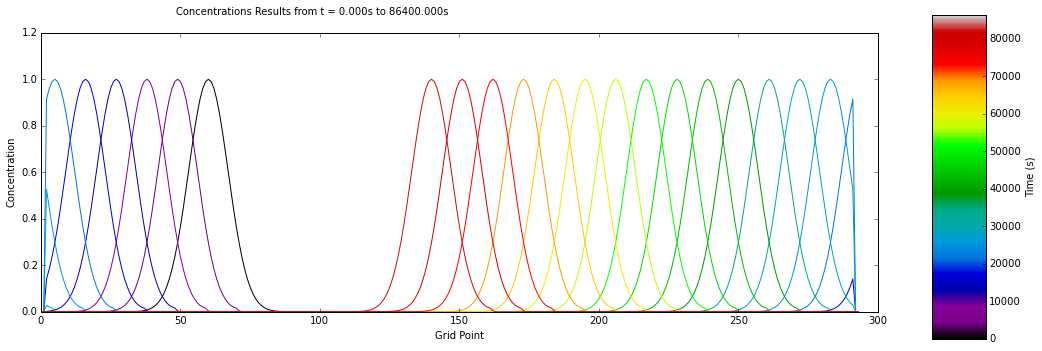

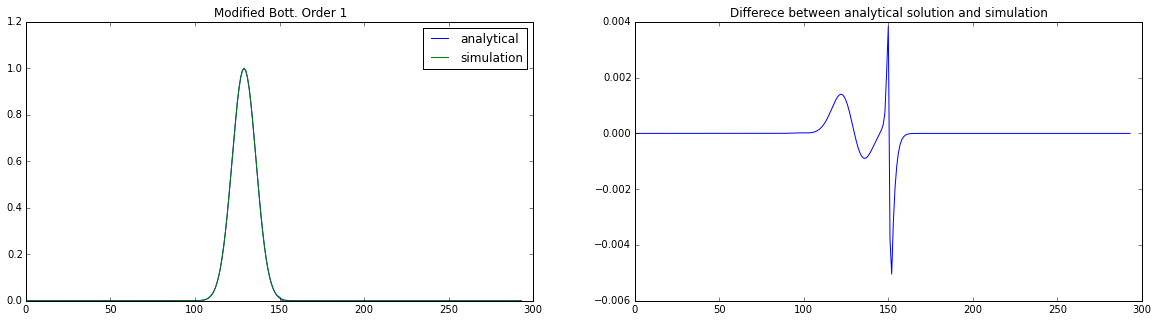

In [7]:
t=24*3600*20
a1,b1,c1,d1=advection3(t,1,'M') #24*3600*20,24h
make_graph(a1,b1,c1,d1)

theFig=plt.figure(figsize=(20,5))
theAx=theFig.add_subplot(121)
ana=analytical(1,a1[-1])
plt.plot(ana[0,:],label='analytical')
plt.plot(a1[-1],label='simulation')
plt.title('Modified Bott. Order 1')
plt.legend()

theAx=theFig.add_subplot(122)
plt.plot(a1[-1]-ana[0,:])
plt.title('Differece between analytical solution and simulation')
print ('sum of absolute error:%s'%np.sum(np.abs(a1[-1]-ana[0,:])))
plt.show()

##scheme3b##

Matrix of Bott Scheme: [[ 0.          0.          1.          0.          0.        ]
 [ 0.16666667 -1.          0.5         0.33333333  0.        ]
 [ 0.          0.5        -1.          0.5         0.        ]
 [-0.16666667  0.5        -0.5         0.16666667  0.        ]]
sum of absolute error:0.0485741692716


/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


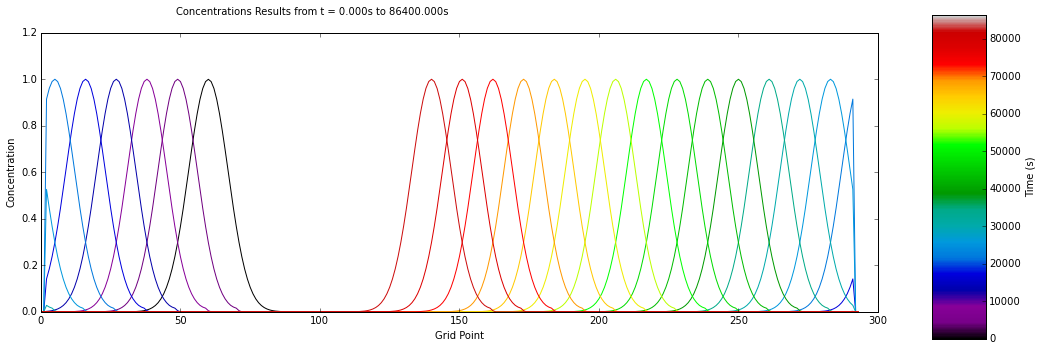

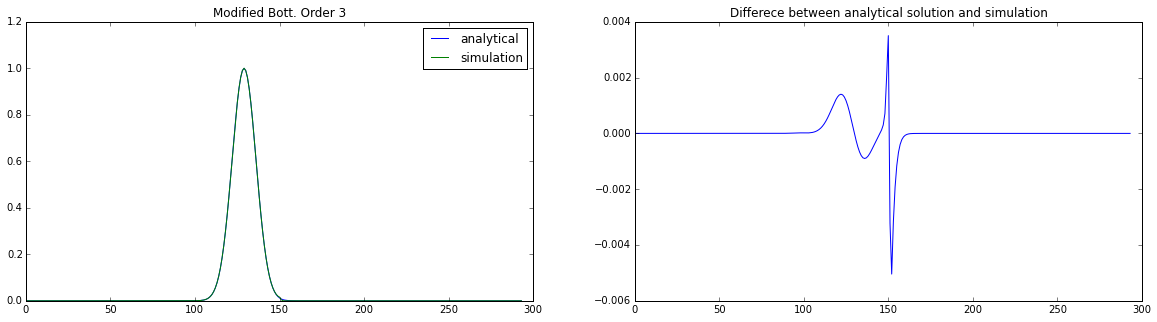

In [8]:
t=24*3600*20
a3,b3,c3,d3=advection3(t,3,'M') #24*3600*20,24h
make_graph(a3,b3,c3,d3)

theFig=plt.figure(figsize=(20,5))
theAx=theFig.add_subplot(121)
ana=analytical(1,a3[-1])
plt.plot(ana[0,:],label='analytical')
plt.plot(a3[-1],label='simulation')
plt.title('Modified Bott. Order 3')
plt.legend()

theAx=theFig.add_subplot(122)
plt.plot(a3[-1]-ana[0,:])
plt.title('Differece between analytical solution and simulation')
print ('sum of absolute error:%s'%np.sum(np.abs(a3[-1]-ana[0,:])))
plt.show()